In [ ]:
pip install tensorflow

# **Importing libraries and modules**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

# **Importing stock dataset**

from https://www.kaggle.com/datasets/aaron7sun/stocknews

In [ ]:
from google.colab import files
files.upload()

Saving upload_DJIA_table.csv to upload_DJIA_table (2).csv


{'upload_DJIA_table (2).csv': b'Date,Open,High,Low,Close,Volume,Adj Close\n2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141\n2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234\n2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688\n2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703\n2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234\n2016-06-24,17946.630859,17946.630859,17356.339844,17400.75,239000000,17400.75\n2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312\n2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078\n2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469\n2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141\n2016-06-17,17733.439453,17733.439453,17602.779297,17675.160156,24868

In [ ]:
stock = pd.read_csv('/content/upload_DJIA_table.csv')

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


# **Exploratory data analysis**

#flipping data to get the oldest values in first place

In [ ]:
stock = stock.reindex(index = stock.index[::-1])
stock.reset_index(inplace = True, drop = True)
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


To clarify column names:

*   Open - price of the stock in the beginning of the day
*   High - price of the stocik in the end of the day

*   Volume - amount of stock sold during the day

*   Low - lowest price of the stock in the whole day
*   Adj Close / Close -  price of the stock in the end of the day





In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


*Date is a object-type class so appropriate move is to change it to datetime.*

*Others are relevant.*

In [ ]:
stock['Date'] =  pd.to_datetime(stock['Date'], format='%Y-%m-%d')
dates = stock['Date'].values

In [ ]:
print(stock.duplicated())
print("\nNumber of duplicated rows: ", sum(stock.duplicated()))

0       False
1       False
2       False
3       False
4       False
        ...  
1984    False
1985    False
1986    False
1987    False
1988    False
Length: 1989, dtype: bool

Number of duplicated rows:  0


We delete "Adj Close" column because it's a duplicate of Close column

In [ ]:
stock.drop('Adj Close', inplace = True, axis = 'columns')
print(stock.columns.values)

['Date' 'Open' 'High' 'Low' 'Close' 'Volume']


Then, we rescale the values (without Date and Volume column)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stock[stock.columns[1:-1]] = scaler.fit_transform(stock[stock.columns[1:-1]])

To adjust Volume column to other values we manually rescale it using min - max method

In [ ]:
print("Before scaling:\n", stock['Volume'][:10])
stock['Volume'] = ( stock['Volume'] - stock['Volume'].min() ) / (stock['Volume'].max() - stock['Volume'].min())
print("After scaling:\n", stock['Volume'][:10])

Before scaling:
 0    212830000
1    183190000
2    173590000
3    182550000
4    159790000
5    215040000
6    156290000
7    171580000
8    144880000
9    130020000
Name: Volume, dtype: int64
After scaling:
 0    0.306702
1    0.262232
2    0.247828
3    0.261271
4    0.227123
5    0.310018
6    0.221872
7    0.244813
8    0.204753
9    0.182458
Name: Volume, dtype: float64


# **Visualization of data**

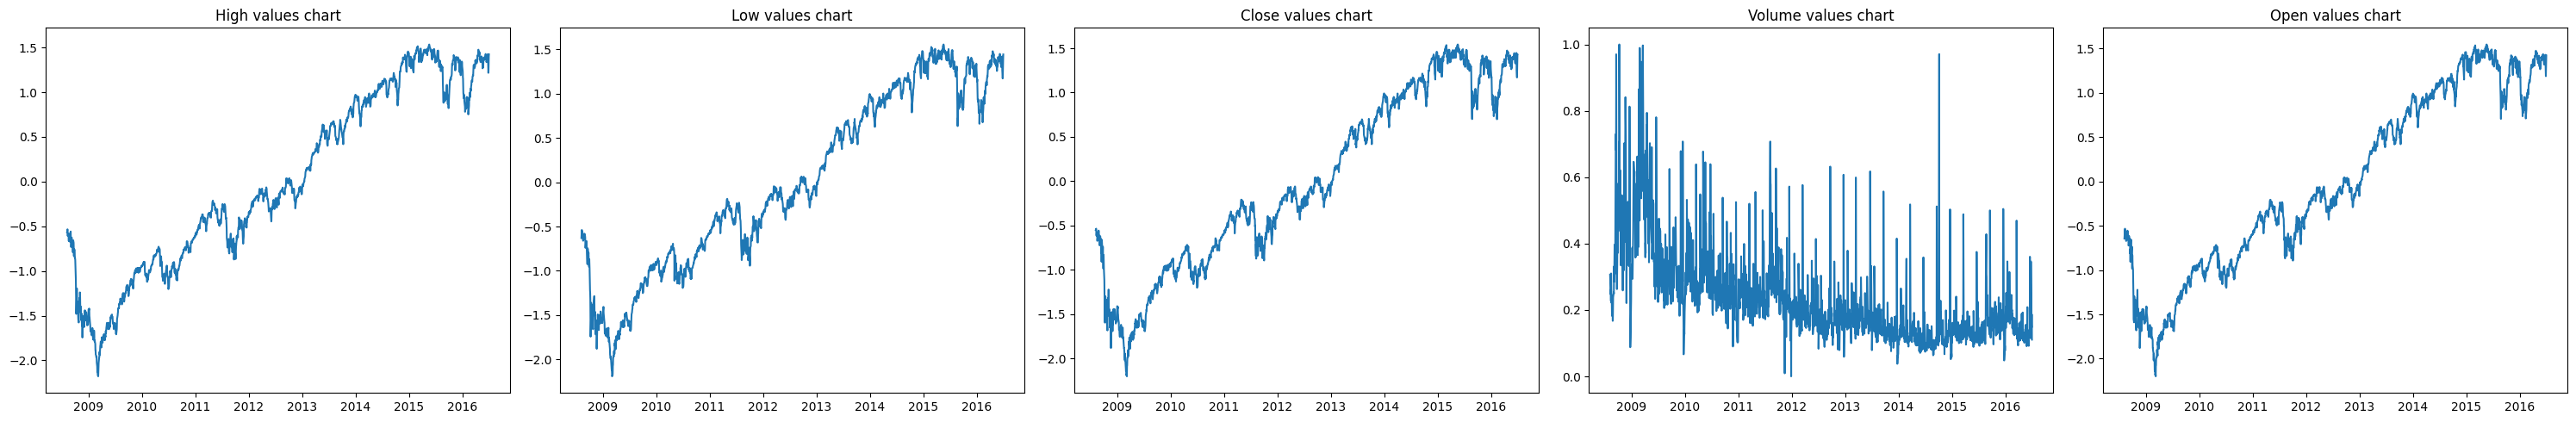

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (30, 5))
for idx, column in enumerate(stock.columns.values[1:]):
  idx -= 1
  ax[idx].plot(dates, stock[column])
  ax[idx].set_title(column + ' values chart')
plt.tight_layout()
plt.show()

On the first sight all of the stock prices value chart looks the same.

Next, we make a boxplot of closing stock prices by year to see adequate changes to graphs shown above and to check for outliers for each year

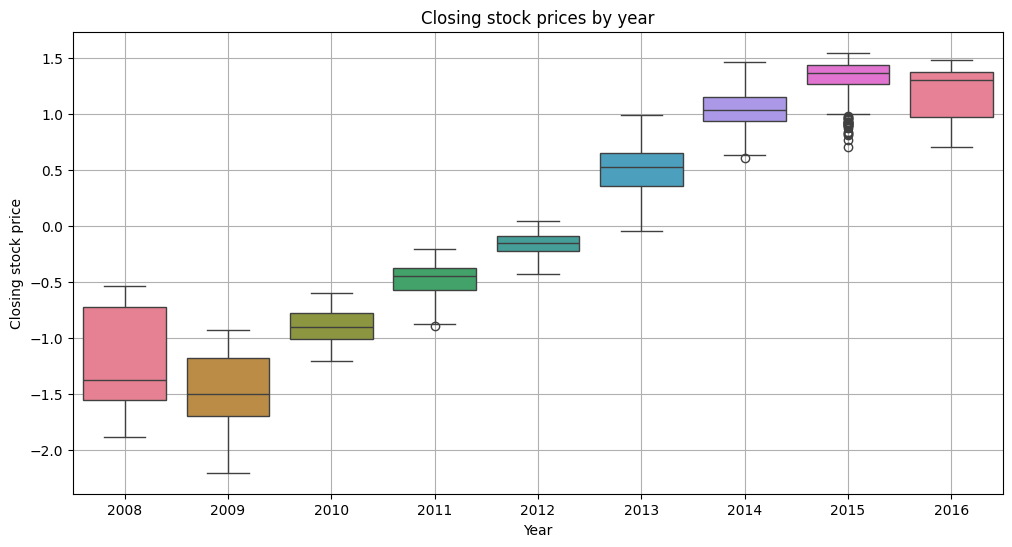

Outliers for year 2008 : 0
Outliers for year 2009 : 0
Outliers for year 2010 : 0
Outliers for year 2011 : 1
Outliers for year 2012 : 0
Outliers for year 2013 : 0
Outliers for year 2014 : 1
Outliers for year 2015 : 25
Outliers for year 2016 : 0


In [ ]:
stock['Year'] = stock['Date'].dt.year

plt.figure(figsize = (12,6))
sns.boxplot(data = stock, x = 'Year', y = 'Close', hue = 'Year', legend = False, palette = "husl")
plt.title("Closing stock prices by year")
plt.xlabel('Year')
plt.ylabel('Closing stock price')
plt.grid(True)
plt.show()

for year in stock['Year'].unique():

  stock_year = stock.loc[stock['Year'] == year, 'Close']
  q1 = stock_year.quantile(0.25)
  q3 = stock_year.quantile(0.75)
  IQR = q3 - q1
  outliers = stock_year[(stock_year < q1 - 1.5 * IQR) | (stock_year > q3 + 1.5 * IQR)]
  print("Outliers for year", year, ":", outliers.count())


Histogram for closing price and volume number

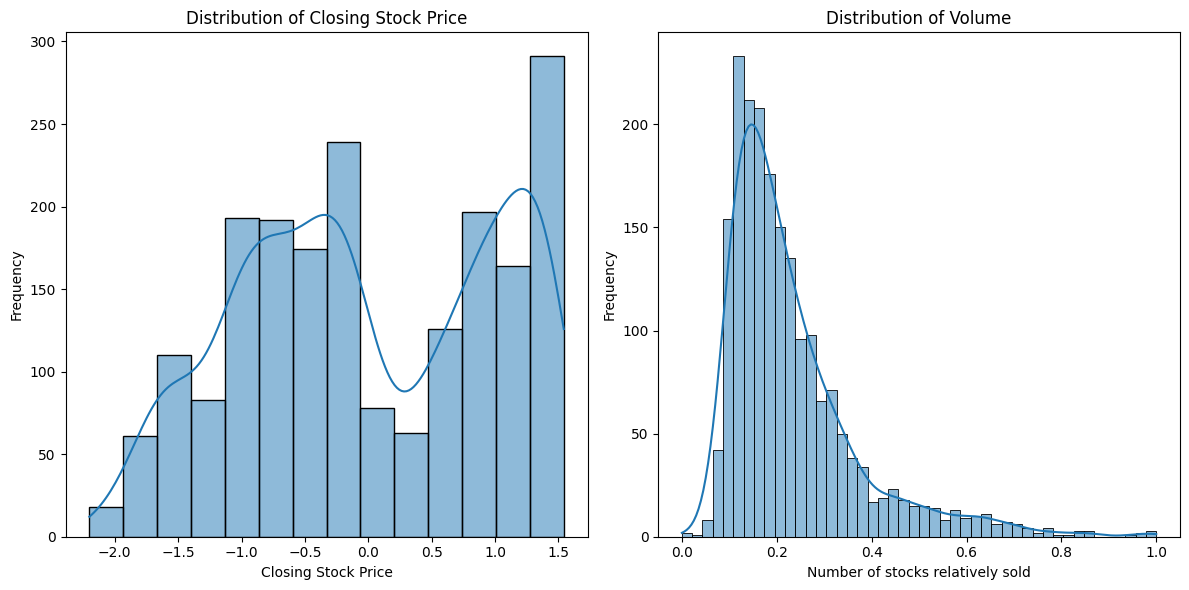

In [ ]:
plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
plt.subplot(1,2,1)
sns.histplot(stock['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(stock['Volume'], kde=True)
plt.title('Distribution of Volume')
plt.xlabel('Number of stocks relatively sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Bimodal and right - skewed distribution

# **Preparing data for model input**

We're going various RNNs for predicting next value based on closing value of stocks.

Thus, we're going to change sequence (T) length and test them on RNN's




#**First case: predicting closing value based on previous sequence**

In [ ]:
data = stock[['Close']].to_numpy()  #changing data type: dataframe --> np.array

T = 10 #sequence length
print(type(data), data.shape)

<class 'numpy.ndarray'> (1989, 1)


We create data_split function to split given data on train / test set with sizes according to test_size. Function has a T (int) arg meaning sequence length.

Func works similar to sklearn.train_test_split

In [ ]:
def data_split(T: int, data, test_size: float):

  X_train = []
  Y_train = []
  X_test = []
  Y_test = []

  for idx in range(data.shape[0] - T):
    if idx < int((data.shape[0] - T) * (1 - test_size)):
      X_train.append(data[idx: idx+T])
      Y_train.append(data[idx + T])
    else:
      X_test.append(data[idx: idx+T])
      Y_test.append(data[idx + T])

  X_train = np.array(X_train, ndmin = 2)
  Y_train = np.array(Y_train)
  X_test = np.array(X_test, ndmin = 2)
  Y_test = np.array(Y_test)

  print(f"X shapes: {X_train.shape, X_test.shape}\nY shapes: {Y_train.shape, Y_test.shape}")

  return X_train, X_test, Y_train, Y_test

Splitting the data

In [ ]:
X_train_10, X_test_10, Y_train_10, Y_test_10 = data_split(T = 10, data = data, test_size = 0.5)

X shapes: ((989, 10, 1), (990, 10, 1))
Y shapes: ((989, 1), (990, 1))


Checking if data was placed correctly

In [ ]:
print(f"x_train: \n{X_train_10[0]},\ndata:\n{data[0:10]},\nY_train: {Y_train_10[0]}\ndata[10]: \n{data[10]} ")

x_train: 
[[-0.54998182]
 [-0.53470151]
 [-0.57920366]
 [-0.61404369]
 [-0.58764725]
 [-0.57365817]
 [-0.63108684]
 [-0.67271294]
 [-0.65079912]
 [-0.64673314]],
data:
[[-0.54998182]
 [-0.53470151]
 [-0.57920366]
 [-0.61404369]
 [-0.58764725]
 [-0.57365817]
 [-0.63108684]
 [-0.67271294]
 [-0.65079912]
 [-0.64673314]],
Y_train: [-0.58378819]
data[10]: 
[-0.58378819] 


#**Creating RNN model classes**
We're going to choose best model out of 3 RNN model types

1.   **SimpleRNN** - based model
2. **Gated Recurrent Unit** - based model
3.   **Long-Short Term Memory** - based model




#**SimpleRNN model - regression class**

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


class Simple_RNN():
  def __init__(self, T, units, activation = 'tanh'):
    self.T = T
    self.units = units
    self.activation = activation
    self.model = self.get_model()

  def get_model(self):

    i = Input(shape = (self.T, 1))
    x = SimpleRNN(units = self.units, activation = self.activation)(i)
    o = Dense(units = 1)(x)
    return Model(inputs = [i], outputs = [o])

  def __getattr__(self, name):
    return getattr(self.model, name) #accessing methods of Model class

#**Gated Recurrent Unit - regression class**

In [ ]:
from tensorflow.keras.layers import GRU

class GRU_RNN():
  def __init__(self, T, units, activation = 'tanh'):
    self.T = T
    self.units = units
    self.activation = activation
    self.model = self.get_model()

  def get_model(self):

    i = Input(shape = (self.T, 1))
    x = GRU(units = self.units, activation = self.activation)(i)
    o = Dense(units = 1)(x)
    return Model(inputs = [i], outputs = [o])

  def __getattr__(self, name):
    return getattr(self.model, name) #accessing methods of Model class


#**LSTM model - regression class**

In [ ]:
from tensorflow.keras.layers import LSTM


class LSTM_RNN():
  def __init__(self, T, units, activation = 'tanh'):
    self.T = T
    self.units = units
    self.activation = activation
    self.model = self.get_model()

  def get_model(self):

    i = Input(shape = (self.T, 1))
    x = LSTM(units = self.units, activation = self.activation)(i)
    o = Dense(units = 1)(x)
    return Model(inputs = [i], outputs = [o])

  def __getattr__(self, name):
    return getattr(self.model, name) #accessing methods of Model class

#**Creating model instances with proper parameters**

Dependencies written below were previously assigned to NN's params for convenient looking for the best parameters for all 3 RNNs by changing parameter values. Parameters that had been tested:


*   learning_rate = [0.01, 0.001, 0.0001]
*   M_units = [5, 10, 15, 20]
*   Epochs = [100, 150]

After finding the best, each NN was changed in regards to their best graph figures.


In [ ]:
"""
M = 3 #number of RNN units
epochs = 100
learning_rate = 0.0001
"""

'\nM = 3 #number of RNN units\nepochs = 100\nlearning_rate = 0.0001\n'

In [ ]:
model_simple_10 = Simple_RNN(T = 10, units = 10)
model_simple_10.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_simple_10 = model_simple_10.fit(X_train_10, Y_train_10, validation_data = (X_test_10, Y_test_10), epochs = 100, verbose = False)

model_GRU_10 = GRU_RNN(T = 10, units = 10)
model_GRU_10.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_GRU_10 = model_GRU_10.fit(X_train_10, Y_train_10, epochs = 100, validation_data = (X_test_10, Y_test_10), verbose = False)

model_LSTM_10 = LSTM_RNN(T = 10, units = 5)
model_LSTM_10.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_LSTM_10 = model_LSTM_10.fit(X_train_10, Y_train_10, epochs = 100, validation_data = (X_test_10, Y_test_10), verbose = False)

In [ ]:
models_history_arr = [r_simple_10, r_GRU_10, r_LSTM_10]

Plotting graph. As input argument comes:

1.   list with history callbacks of fitting every model
2.   names of every model needed to plot titles of graphs



In [ ]:
def history_graph(models_history_arr: list, model_names: list):

  nrows = 1
  ncols = len(models_history_arr)
  plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,6))
  for idx, model in enumerate(models_history_arr):
    plt.subplot(nrows, ncols ,idx+1)
    plt.plot(model.history['loss'], color = 'blue', label = 'train loss')
    plt.plot(model.history['val_loss'], color = 'red', label = 'test loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss value')
    plt.title(model_names[idx])
    plt.legend()
  plt.show()


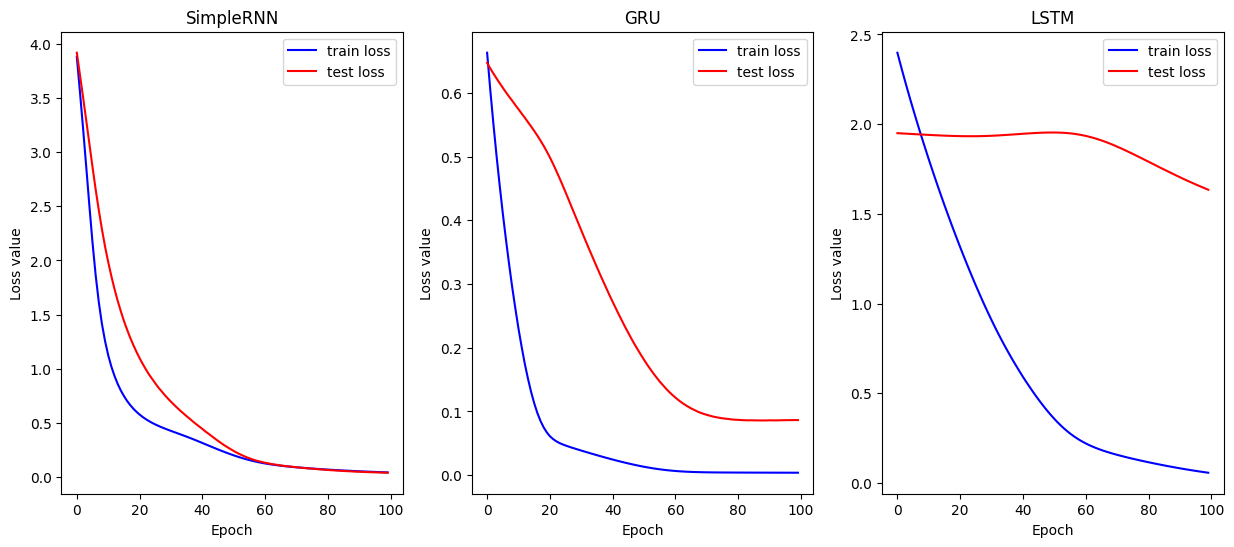

In [ ]:
history_graph(models_history_arr, ['SimpleRNN', 'GRU', 'LSTM'])

Showed above, these are the best figures that could have been done using chosen values.
As a result, for the sequence length T = 10, the best model is SimpleRNN with parameters:


*   learning_rate = 0.0001
*   M = 10
*   epochs = 100

The worst and most imbalanced for different, checked parameters is LSTM.
Let's see how SimpleRNN model is predicting values in comparison to original data.


31/31 [==============================] - 0s 6ms/step


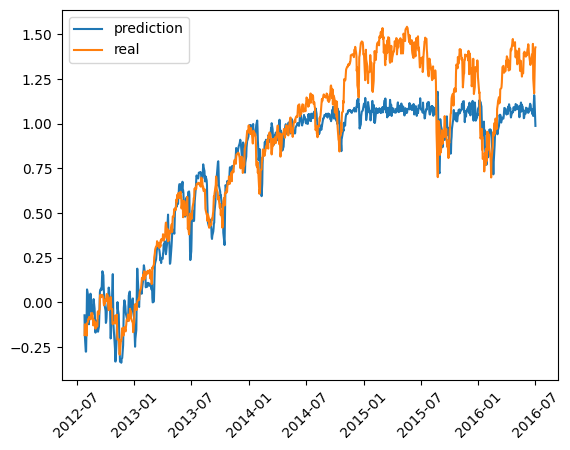

In [ ]:
Y_pred_10 = model_simple_10.predict(X_test_10)

plt.figure()
plt.plot(dates[dates.shape[0] - Y_pred_10.shape[0]:], Y_pred_10, label = 'prediction')
plt.plot(dates[dates.shape[0] - Y_pred_10.shape[0]:], Y_test_10, label = 'real')
plt.legend()
plt.xticks(rotation = 45)

plt.show()

For comparison to next models, let's calculate Mean Absolute Error of prediction above

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test_10, Y_pred_10)
print("Mean absolute error: ", mae)

Mean absolute error:  0.15419127514976888


# **Now, let's see how does a lengthening of sequence T correlate with our models.**

#**Preparing new data with sequence length T = 20**

In [ ]:
X_train_20, X_test_20, Y_train_20, Y_test_20 = data_split(T = 20, data = data, test_size = 0.5)

X shapes: ((984, 20, 1), (985, 20, 1))
Y shapes: ((984, 1), (985, 1))


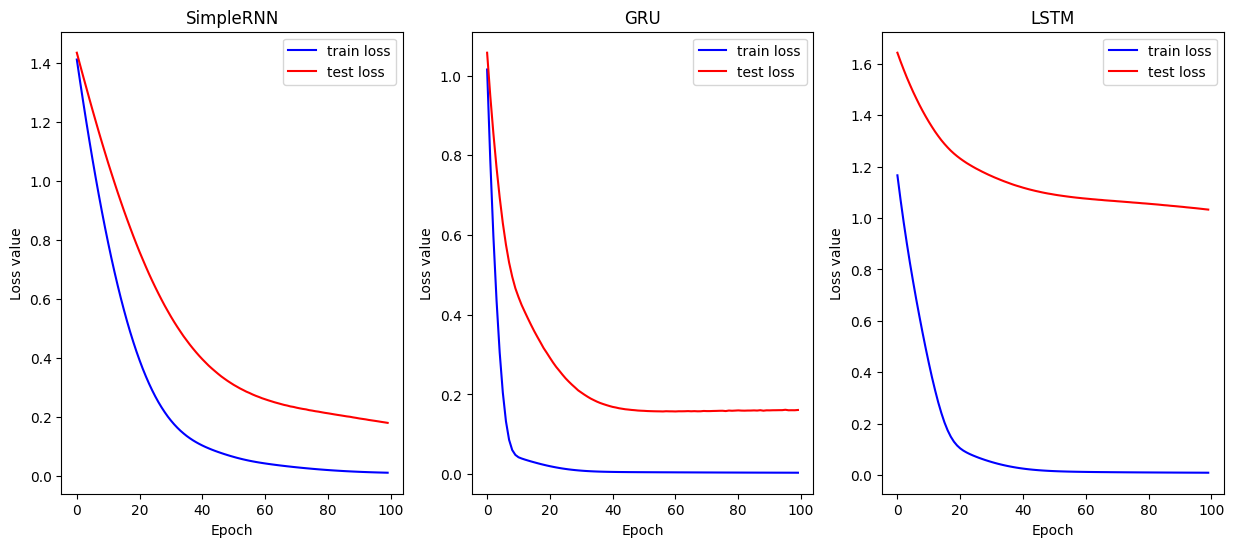

In [ ]:
model_simple_20 = Simple_RNN(T = 20, units = 5, activation = 'tanh')    #lub units = 20
model_simple_20.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_simple_20 = model_simple_20.fit(X_train_20, Y_train_20, validation_data = (X_test_20, Y_test_20), epochs = 100, verbose = False)


model_GRU_20 = GRU_RNN(T = 20, units = 30, activation = 'tanh')
model_GRU_20.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_GRU_20 = model_GRU_20.fit(X_train_20, Y_train_20, epochs = 100, validation_data = (X_test_20, Y_test_20), verbose = False)

model_LSTM_20 = LSTM_RNN(T = 20, units = 10, activation = 'tanh')
model_LSTM_20.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_LSTM_20 = model_LSTM_20.fit(X_train_20, Y_train_20, epochs = 100, validation_data = (X_test_20, Y_test_20), verbose = False)


models_history_arr = [r_simple_20, r_GRU_20, r_LSTM_20]

history_graph(models_history_arr, ['SimpleRNN', 'GRU', 'LSTM'])



As shown, models that meet the requirements of non overtraining and having relatively small Loss value are SimpleRNN and GRU with results around 0.1 value loss.

31/31 [==============================] - 0s 3ms/step


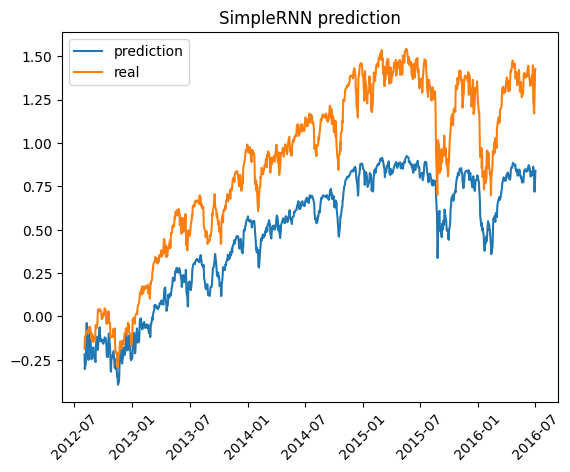

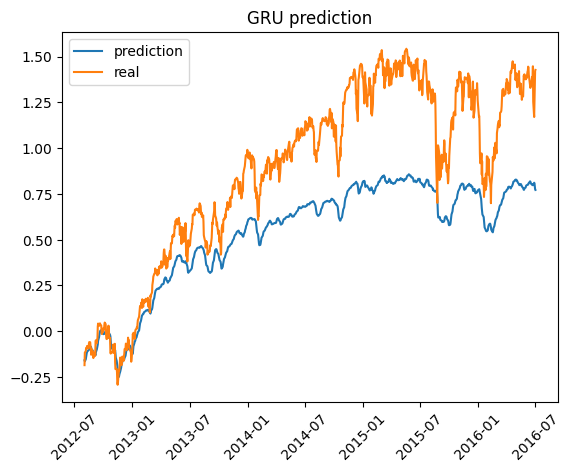

Mean absolute error SimpleRNN:  0.3971329403988782 
Mean absolute error GRU:  0.3447937173596846


In [ ]:
Y_pred_simple_20 = model_simple_20.predict(X_test_20)
Y_pred_GRU_20 = model_GRU_20.predict(X_test_20)

plt.figure()
plt.plot(dates[dates.shape[0] - Y_pred_simple_20.shape[0]:], Y_pred_simple_20, label = 'prediction')
plt.plot(dates[dates.shape[0] - Y_pred_simple_20.shape[0]:], Y_test_20, label = 'real')
plt.legend()
plt.xticks(rotation = 45)
plt.title("SimpleRNN prediction")
plt.show()

plt.figure()
plt.plot(dates[dates.shape[0] - Y_pred_GRU_20.shape[0]:], Y_pred_GRU_20, label = 'prediction')
plt.plot(dates[dates.shape[0] - Y_pred_GRU_20.shape[0]:], Y_test_20, label = 'real')
plt.legend()
plt.xticks(rotation = 45)
plt.title("GRU prediction")
plt.show()


print("Mean absolute error SimpleRNN: ", mean_absolute_error(Y_test_20, Y_pred_simple_20), "\nMean absolute error GRU: ", mean_absolute_error(Y_test_20, Y_pred_GRU_20))

#**T = 30**

In [ ]:
X_train_30, X_test_30, Y_train_30, Y_test_30 = data_split(T = 30, data = data, test_size = 0.5)

X shapes: ((979, 30, 1), (980, 30, 1))
Y shapes: ((979, 1), (980, 1))


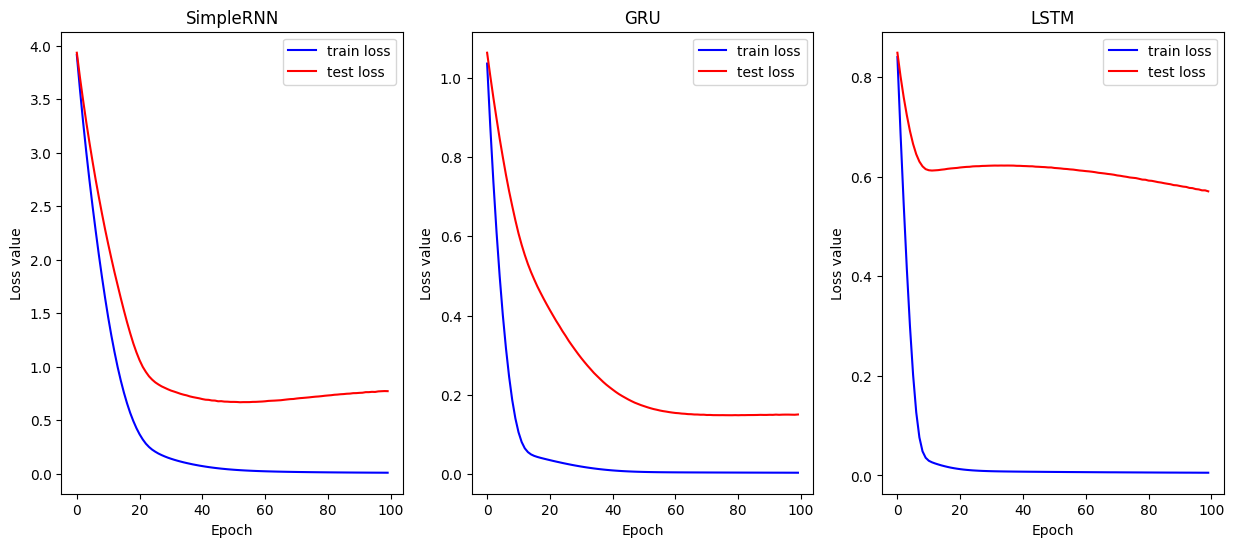

In [ ]:
model_simple_30 = Simple_RNN(T = 30, units = 10, activation = 'tanh')    #lub units = 20
model_simple_30.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_simple_30 = model_simple_30.fit(X_train_30, Y_train_30, validation_data = (X_test_30, Y_test_30), epochs = 100, verbose = False)


model_GRU_30 = GRU_RNN(T = 30, units = 20, activation = 'tanh')
model_GRU_30.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_GRU_30 = model_GRU_30.fit(X_train_30, Y_train_30, epochs = 100, validation_data = (X_test_30, Y_test_30), verbose = False)

model_LSTM_30 = LSTM_RNN(T = 30, units = 20, activation = 'tanh')
model_LSTM_30.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
r_LSTM_30 = model_LSTM_30.fit(X_train_30, Y_train_30, epochs = 100, validation_data = (X_test_30, Y_test_30), verbose = False)


models_history_arr = [r_simple_30, r_GRU_30, r_LSTM_30]

history_graph(models_history_arr, ['SimpleRNN', 'GRU', 'LSTM'])

Most valuable models comes from SimpleRNN and GRU model.

31/31 [==============================] - 0s 4ms/step


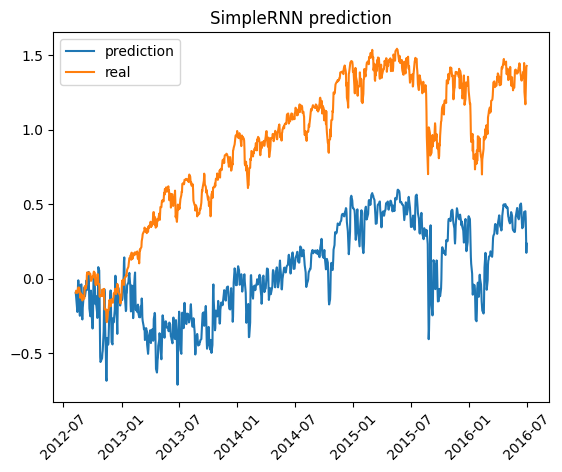

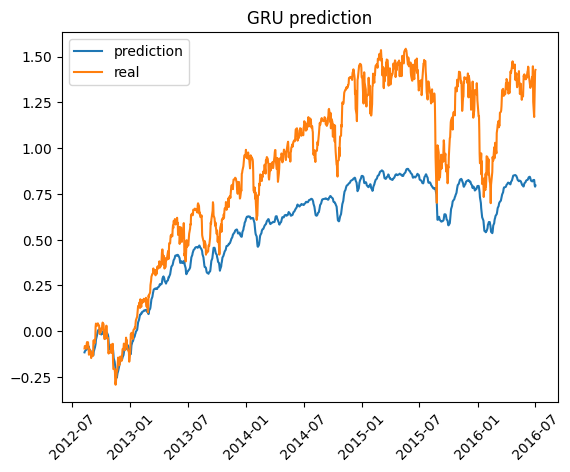

MAE error SimpleRNN:  0.8290775160876571
MAE error GRU:  0.33547261818620816


In [ ]:
Y_pred_simple_30 = model_simple_30.predict(X_test_30)
Y_pred_GRU_30 = model_GRU_30.predict(X_test_30)

plt.figure()
plt.plot(dates[dates.shape[0] - Y_pred_simple_30.shape[0]:], Y_pred_simple_30, label = 'prediction')
plt.plot(dates[dates.shape[0] - Y_pred_simple_30.shape[0]:], Y_test_30, label = 'real')
plt.legend()
plt.xticks(rotation = 45)
plt.title("SimpleRNN prediction")
plt.show()

plt.figure()
plt.plot(dates[dates.shape[0] - Y_pred_GRU_30.shape[0]:], Y_pred_GRU_30, label = 'prediction')
plt.plot(dates[dates.shape[0] - Y_pred_GRU_30.shape[0]:], Y_test_30, label = 'real')
plt.legend()
plt.xticks(rotation = 45)
plt.title("GRU prediction")
plt.show()

print("MAE error SimpleRNN: ", mean_absolute_error(Y_test_30, Y_pred_simple_30))
print("MAE error GRU: ", mean_absolute_error(Y_test_30, Y_pred_GRU_30))

#**Summary**

Let's visualize all the best solutions on plots and compare MAE of every single one.

31/31 [==============================] - 0s 6ms/step


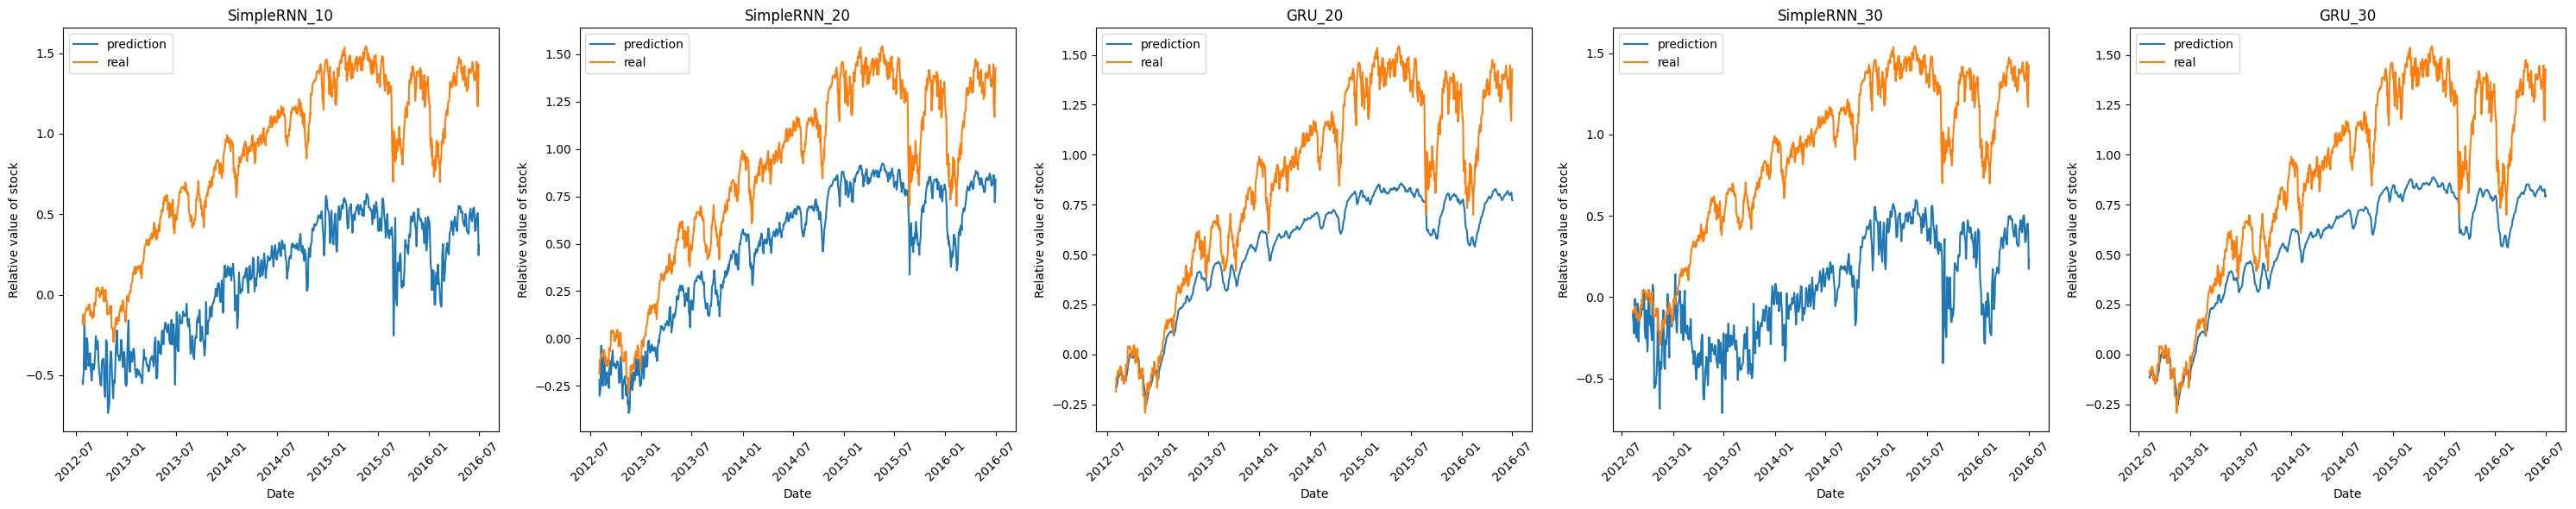

MAE of SimpleRNN_10: 0.7727297209085668

MAE of SimpleRNN_20: 0.3971329403988782

MAE of GRU_20: 0.3447937173596846

MAE of SimpleRNN_30: 0.8290775160876571

MAE of GRU_30: 0.33547261818620816

Lowest error for model:  GRU_30


In [ ]:
fig, axs = plt.subplots( nrows = 1, ncols = 5, figsize=(30, 6))  # Tworzy jeden wiersz pięciu subplotów

Y_pred_simple_10 = model_simple_30.predict(X_test_10)
Y_pred_simple_20 = model_simple_20.predict(X_test_20)
Y_pred_GRU_20 = model_GRU_20.predict(X_test_20)
Y_pred_simple_30 = model_simple_30.predict(X_test_30)
Y_pred_GRU_30 = model_GRU_30.predict(X_test_30)

preds = [Y_pred_simple_10, Y_pred_simple_20, Y_pred_GRU_20, Y_pred_simple_30, Y_pred_GRU_30]

#preds_targets = {Y_pred_simple_10 : Y_test_10, Y_pred_simple_20: Y_test_20, Y_pred_GRU_20: Y_test_20, Y_pred_simple_30: Y_test_30, Y_pred_GRU_30 : Y_test_30}
targets = [Y_test_10, Y_test_20, Y_test_20, Y_test_30, Y_test_30]
seqs = [10, 20, 20, 30, 30]
titles = ["SimpleRNN", "SimpleRNN", "GRU", "SimpleRNN", "GRU"]
errors = {}

# Rysowanie danych na każdym z pięciu subplotów
for idx, pred in enumerate(preds):
  name = titles[idx] + '_' + str(seqs[idx])
  axs[idx].plot(dates[dates.shape[0] - pred.shape[0]:], pred, label = 'prediction')
  axs[idx].plot(dates[dates.shape[0] - pred.shape[0]:], targets[idx], label = 'real')
  axs[idx].set_xlabel('Date')
  axs[idx].set_ylabel('Relative value of stock')
  axs[idx].legend()
  axs[idx].tick_params(axis='x', rotation=45)
  axs[idx].set_title(name)
  errors[name] = (mean_absolute_error(targets[idx], pred))
plt.tight_layout()
plt.show()


lowest = 10 #random value
lowest_key = ''

for key, value in errors.items():
  if value < lowest:
    lowest = value
    lowest_key = key
  print(f"MAE of {key}: {value}\n")
print("Lowest error for model: ", lowest_key)

As seen above, the best model for DJIA prediction is Gated - Recurrent Unit-type RNN that worked on a data with sequences of length 30. As we see, it is impossible for computer to do such a imaginary thing as predicting stock prices. Stocks are dependent on high amount of factors and models created by computers would have to gather a lot of information to make their forecasts more trusting.
For the future, another good example of testing these RNNs would be via binary classification to forecast if a price of stock would go up or down the next day.